In [49]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import sklearn

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [51]:
df=pd.read_csv('grades.csv')
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [4]:
df.shape

(571, 43)

In [5]:
df.describe(include="all")

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
count,571,571,571,570,570,569,571,569,569,569,...,561,559,559,559,486,558,558,557,492,571.000000
unique,571,13,12,13,13,13,11,13,13,12,...,14,12,11,13,14,13,12,12,13,NaN
top,CS-97001,A-,A-,A,A,A-,A,A-,A-,A-,...,A+,B-,A,B,A-,A,A-,A-,A-,NaN
freq,1,112,82,177,96,105,151,116,105,137,...,93,79,133,86,177,176,120,122,157,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.954888
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.620552
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.800000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.538000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.029000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.451000


EDA

In [6]:
df=df.drop_duplicates()

In [7]:
df.shape

(571, 43)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

check for null values

In [9]:
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
df.shape

(417, 43)

All the null values are been removed

In [12]:
df.isnull().sum()

Seat No.     0
PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

In [13]:
df.drop("Seat No.",axis=1,inplace=True)

The first column is not required so its been removed

In [14]:
categorical_cols=[]
for x in df.columns:
    if df.dtypes[x]== 'object' :
        categorical_cols.append(x)


In [15]:
len(categorical_cols)

41

In [16]:
df['PH-121'].value_counts()

PH-121
A     105
A-    103
B+     50
B-     43
B      36
A+     22
C      17
C+     14
C-     11
D+      9
D       7
Name: count, dtype: int64

Encoding

In [17]:
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd

In [18]:
ordinal_encoder = OrdinalEncoder()

In [19]:
len(categorical_cols)

41

In [20]:
#df[categorical_cols] = ordinal_encoder.fit_transform(df[categorical_cols])

but by doing this its correctly not ordered

In [21]:
for i in categorical_cols:
    df[i][df[i]=="A+"]=10.0
    df[i][df[i]=="A"]=9.0
    df[i][df[i]=="A-"]=8.0
    df[i][df[i]=="B+"]=7.0
    df[i][df[i]=="B"]=6.0
    df[i][df[i]=="B-"]=5.0
    df[i][df[i]=="C+"]=4.0
    df[i][df[i]=="C"]=3.0
    df[i][df[i]=="C-"]=2.0
    df[i][df[i]=="D+"]=1.0
    df[i][df[i]=="D"]=0.0
    df[i][df[i]=="F"]=-1.0
    df[i][df[i]=="WU"]=-2.0
    df[i][df[i]=="W"]=-3.0
    df[i] = df[i].astype(float)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 417 entries, 0 to 570
Data columns (total 42 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PH-121     417 non-null    float64
 1   HS-101     417 non-null    float64
 2   CY-105     417 non-null    float64
 3   HS-105/12  417 non-null    float64
 4   MT-111     417 non-null    float64
 5   CS-105     417 non-null    float64
 6   CS-106     417 non-null    float64
 7   EL-102     417 non-null    float64
 8   EE-119     417 non-null    float64
 9   ME-107     417 non-null    float64
 10  CS-107     417 non-null    float64
 11  HS-205/20  417 non-null    float64
 12  MT-222     417 non-null    float64
 13  EE-222     417 non-null    float64
 14  MT-224     417 non-null    float64
 15  CS-210     417 non-null    float64
 16  CS-211     417 non-null    float64
 17  CS-203     417 non-null    float64
 18  CS-214     417 non-null    float64
 19  EE-217     417 non-null    float64
 20  CS-212     417 

check for outliers

PH-121           Axes(0.125,0.77;0.0945122x0.11)
HS-101        Axes(0.238415,0.77;0.0945122x0.11)
CY-105        Axes(0.351829,0.77;0.0945122x0.11)
HS-105/12     Axes(0.465244,0.77;0.0945122x0.11)
MT-111        Axes(0.578659,0.77;0.0945122x0.11)
CS-105        Axes(0.692073,0.77;0.0945122x0.11)
CS-106        Axes(0.805488,0.77;0.0945122x0.11)
EL-102          Axes(0.125,0.638;0.0945122x0.11)
EE-119       Axes(0.238415,0.638;0.0945122x0.11)
ME-107       Axes(0.351829,0.638;0.0945122x0.11)
CS-107       Axes(0.465244,0.638;0.0945122x0.11)
HS-205/20    Axes(0.578659,0.638;0.0945122x0.11)
MT-222       Axes(0.692073,0.638;0.0945122x0.11)
EE-222       Axes(0.805488,0.638;0.0945122x0.11)
MT-224          Axes(0.125,0.506;0.0945122x0.11)
CS-210       Axes(0.238415,0.506;0.0945122x0.11)
CS-211       Axes(0.351829,0.506;0.0945122x0.11)
CS-203       Axes(0.465244,0.506;0.0945122x0.11)
CS-214       Axes(0.578659,0.506;0.0945122x0.11)
EE-217       Axes(0.692073,0.506;0.0945122x0.11)
CS-212       Axes(0.

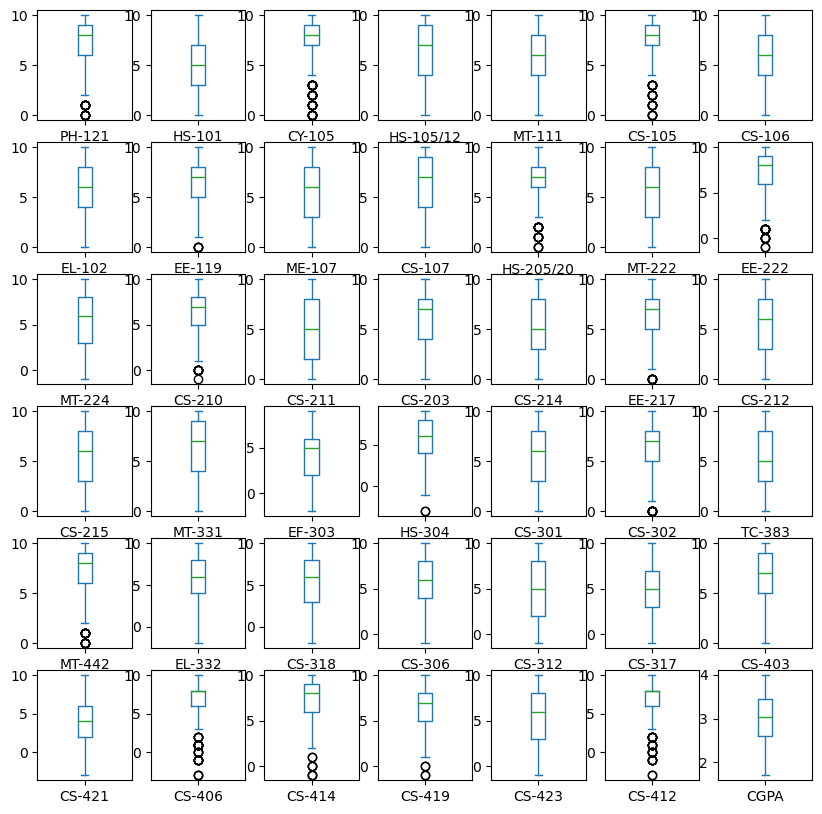

In [24]:
df.plot(kind='box',subplots=True,layout=(6,7),figsize=(10,10))

So there are outliers but no need to rectify it

Correlation check

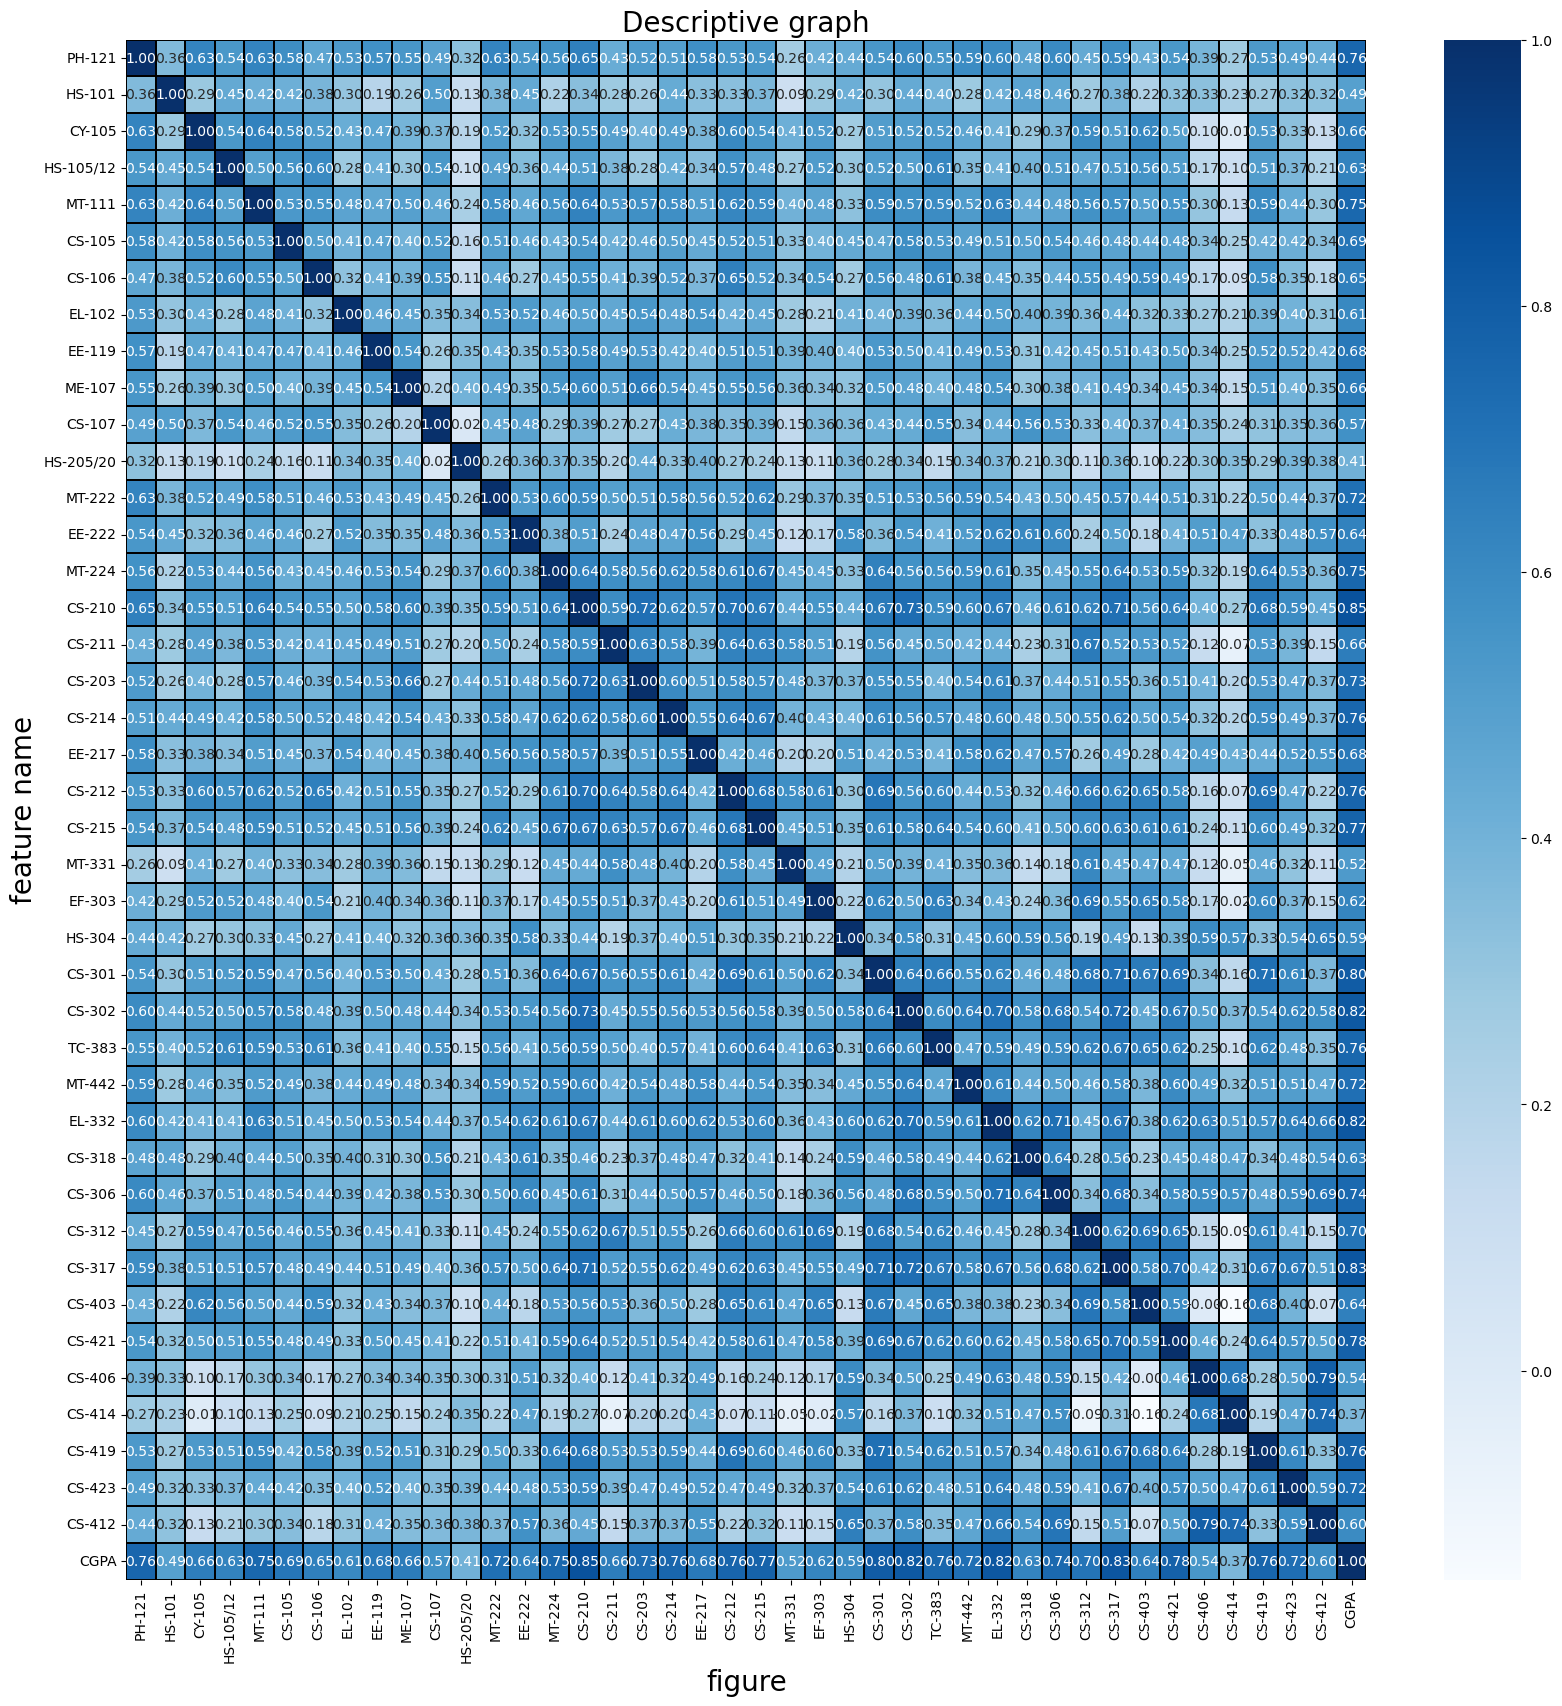

In [25]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='black',cmap='Blues')
plt.xlabel('figure',fontsize=20)
plt.ylabel('feature name',fontsize=20)
plt.title('Descriptive graph',fontsize=20)
plt.show()

In [26]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range (len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [27]:
correlation(df[categorical_cols],0.8)

set()

So there are no much correlation between the features

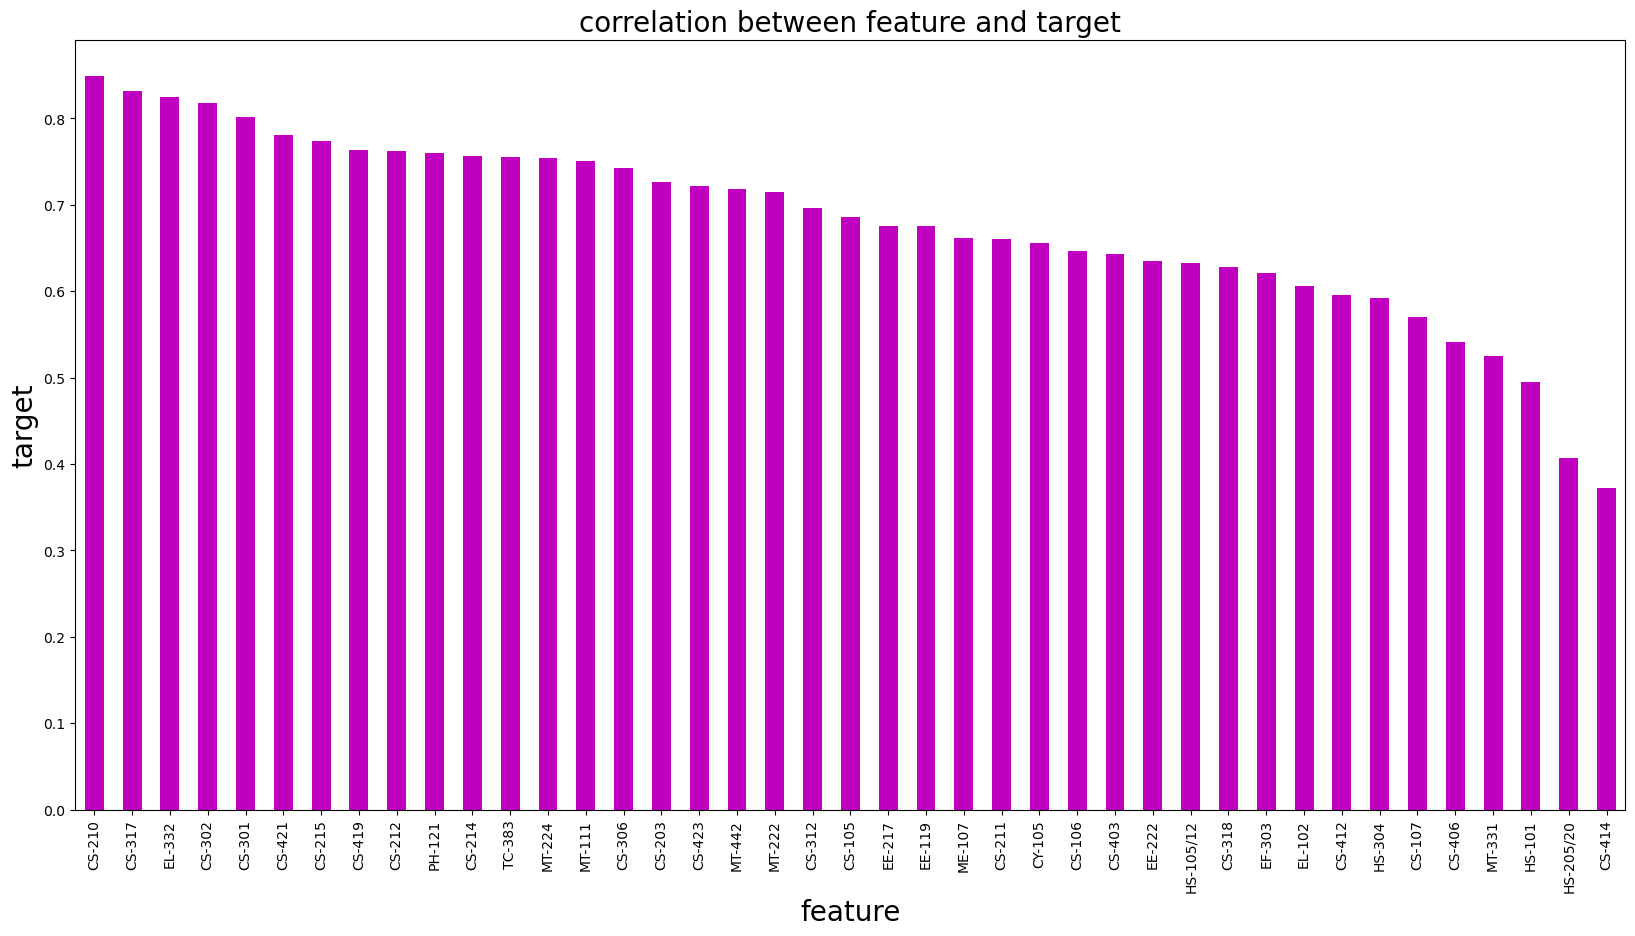

In [28]:
plt.figure(figsize=(20,10))
df.corr()['CGPA'].sort_values(ascending = False).drop(['CGPA']).plot(kind='bar',color='m')
plt.xlabel('feature',fontsize=20)
plt.ylabel('target',fontsize=20)
plt.title('correlation between feature and target',fontsize=20)
plt.show()

So all features are highly important , no need to drop the features

In [29]:
x=df.drop(['CGPA'],axis=1)
y=df['CGPA']

Scaling of parameters

In [30]:
scaler=StandardScaler()
X=scaler.fit_transform(x)
X

array([[-0.8461402 , -1.45319275, -2.30130111, ..., -1.88982272,
         0.30819468,  0.55131033],
       [ 0.86875878, -1.82818123, -2.73337791, ..., -1.43639575,
        -0.84615125, -0.31786323],
       [ 0.86875878,  0.42174963,  0.72323646, ...,  1.28416607,
         1.07775863,  0.98589711],
       ...,
       [-0.41741546,  1.54671506,  0.29115966, ...,  0.37731213,
         1.07775863,  0.55131033],
       [ 0.86875878,  0.79673811, -3.16545471, ..., -0.07611484,
        -0.0765873 , -1.62162357],
       [-1.70358969, -1.82818123, -3.16545471, ...,  0.37731213,
        -2.00049718, -2.05621036]])

Find best Model

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [32]:
lr=LinearRegression()
maxAcc=0
rs=0
for i in range(200):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    ac=r2_score(y_test,pred)
    if ac>maxAcc:
        maxAcc=ac
        rs=i
        
print("Best score ",maxAcc)
print("random state ",rs)

Best score  0.9977490299946727
random state  109


In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge

In [34]:
def Regression(lr,x,y):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=65)
    lr.fit(x_train,y_train)
    pred_test=lr.predict(x_test)
    pred_train=lr.predict(x_train)
    print("R2 score for test data:",r2_score(y_test,pred_test))
    print("R2 score train data :",r2_score(y_train,pred_train)*100)
    print("Mean absolute error:",mean_absolute_error(y_test,pred_test))
    print("Mean squared error:",mean_squared_error(y_test,pred_test))
    print("Root Mean squared error:",np.sqrt(mean_absolute_error(y_test,pred_test)))

In [35]:
lr=LinearRegression()
Regression(lr,x,y)

R2 score for test data: 0.9964488332677244
R2 score train data : 99.71910299029332
Mean absolute error: 0.025726323008005782
Mean squared error: 0.0012025704138217239
Root Mean squared error: 0.16039427361351086


In [36]:
lr=RandomForestRegressor()
Regression(lr,x,y)

R2 score for test data: 0.9642609029920781
R2 score train data : 99.21251803933764
Mean absolute error: 0.08739992063492047
Mean squared error: 0.012102721138888854
Root Mean squared error: 0.29563477575366615


In [37]:
lr=DecisionTreeRegressor()
Regression(lr,x,y)

R2 score for test data: 0.8371337154591388
R2 score train data : 100.0
Mean absolute error: 0.17250793650793655
Mean squared error: 0.055153190476190495
Root Mean squared error: 0.41534074746879407


In [38]:
lr=KNN()
Regression(lr,x,y)

R2 score for test data: 0.9738611727796386
R2 score train data : 98.12102728188167
Mean absolute error: 0.07306349206349211
Mean squared error: 0.008851676825396835
Root Mean squared error: 0.2703025935197295


In [39]:
lr=Ridge()
Regression(lr,x,y)

R2 score for test data: 0.9964755653960289
R2 score train data : 99.71907755355036
Mean absolute error: 0.02563065587964783
Mean squared error: 0.0011935178209638952
Root Mean squared error: 0.16009577096115885


In [40]:
lr=Lasso()
Regression(lr,x,y)

R2 score for test data: -0.04427339046196188
R2 score train data : 0.0
Mean absolute error: 0.5020265913925708
Mean squared error: 0.35363371477241473
Root Mean squared error: 0.7085383485687777


Out of these the linear regression is giving good results

In [41]:
from sklearn.model_selection import GridSearchCV

In [42]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=65)

model = LinearRegression()

param_grid = {
    'fit_intercept': [True, False], 
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

best_model = grid_search.best_estimator_
test_score = best_model.score(x_test, y_test)
print("Test Set Score:", test_score)

Best Parameters: {'fit_intercept': True}
Best Score: nan
Test Set Score: 0.9964488332677244


check how the model is working

In [43]:
def Predictor(lr,x,y,input_data):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=139)
    lr.fit(x_train,y_train)
    pred_test=lr.predict(x_test)
    pred_train=lr.predict(x_train)
    input_data_array=np.asarray(input_data)
    reshapedarray=input_data_array.reshape(1,-1)
    prediction=lr.predict(reshapedarray)
    print(prediction)

In [44]:
list=["D","C+","D+","D","D","A-","D+","C-","D","C+","D","B","D+","B-","D","C","B+","C+","D","D+","D","D","D+","D","B-","D","B-","D+","C-","D+","B+","C-","D+","C","D+","C-","B-","B","C+","C+","C+"]

In [45]:
for i in range (len(list)):
    if list[i]=="A+":
        list[i]=10
    if list[i]=="A":
        list[i]=9
    if list[i]=="A-":
        list[i]=8
    if list[i]=="B+":
        list[i]=7
    if list[i]=="B":
        list[i]=6
    if list[i]=="B-":
        list[i]=5
    if list[i]=="C+":
        list[i]=4
    if list[i]=="C":
        list[i]=3
    if list[i]=="C-":
        list[i]=2
    if list[i]=="D+":
        list[i]=1
    if list[i]=="D":
        list[i]=0
    if list[i]=="F":
        list[i]=-1
    if list[i]=="WU":
        list[i]=-2
    if list[i]=="W":
        list[i]=-3
    

In [46]:
input_data=(list)
lr=LinearRegression()
Predictor(lr,x,y,input_data)

[1.90218693]


The original output for the above input in 1.906 we got 1.902...The model is working very good

In [47]:
import pickle

In [48]:
filename='Grades.pkl'
pickle.dump(lr,open(filename,'wb'))

So the model is saved